# Initial EDA

Author: Holly Bok

In [1]:
# Importing packages and reading in the clean active players dataset as 'df'
# Observing the first 5 rows of the dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('datasets/NBAPlayers.csv')

df.head()

,player_id,player_name,team,height,weight,seasons,points,games,games_started,minutes_played,...,19_20_salary,future_salary,avg_pnts_per_game,pct_of_games_started,heights_inches,draft_1st_pick,draft_2nd_pick,draft_undrafted,draft_number_group,draft_nmbr_grp_rank
0,1626147,Justin Anderson,BKN,6-6,230.0,4,1157,219,23,2874.0,...,91557,0,5.283105,0.105023,78,1,0,0,21-30,3
1,201583,Ryan Anderson,HOU,6-9,240.0,11,8001,649,289,16768.0,...,5714583,1,12.328197,0.445300,81,1,0,0,21-30,3
2,1628395,Jordan Bell,MIN,7-1,249.0,2,578,154,16,1854.0,...,1620564,0,3.753247,0.103896,85,0,1,0,31-40,4
3,1628413,Jonah Bolden,PHX,6-6,215.0,1,217,51,10,686.0,...,1788296,0,4.254902,0.196078,78,0,1,0,31-40,4
4,1629151,Ryan Broekhoff,DAL,6-0,185.0,1,238,59,1,634.0,...,1416852,0,4.033898,0.016949,72,0,0,1,Undrafted,8


In [8]:
# Observing the max and min salaries in the league

df['19_20_salary'].min(), df['19_20_salary'].max()

(79568, 40231758)

In [10]:
# Observing the value counts of salaries in the league

df['19_20_salary'].value_counts().head(10)

79568       44
898310      19
1416852     18
2564753     10
4767000      9
1618520      8
1620564      5
32742000     5
1445697      5
8000000      4
Name: 19_20_salary, dtype: int64

In [51]:
# Printing descriptive statistics for each feature

df.describe()

,player_id,weight,seasons,points,games,games_started,minutes_played,field_goals_made,3_pntrs_made,field_goals_pct_made,...,start_year,19_20_salary,future_salary,avg_pnts_per_game,pct_of_games_started,heights_inches,draft_1st_pick,draft_2nd_pick,draft_undrafted,draft_nmbr_grp_rank
count,4.670000e+02,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,...,467.000000,4.670000e+02,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,1.046375e+06,218.207709,4.029979,3448.719486,291.263383,172.173448,7529.224839,1272.085653,293.314775,0.439939,...,2014.890792,7.392151e+06,0.650964,8.640617,0.393647,78.404711,0.522484,0.237687,0.239829,4.002141
std,7.074318e+05,24.625820,4.046824,4592.110644,284.450727,232.922895,8718.426776,1664.896754,424.092226,0.108420,...,4.071104,9.157666e+06,0.477177,5.631109,0.343546,3.424385,0.500030,0.426123,0.427437,2.644534
min,1.713000e+03,160.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1998.000000,7.956800e+04,0.000000,0.000000,0.000000,69.000000,0.000000,0.000000,0.000000,1.000000
25%,2.031195e+05,200.000000,1.000000,258.000000,52.500000,3.500000,804.500000,93.500000,9.000000,0.411571,...,2012.500000,1.445697e+06,0.000000,4.601877,0.046727,76.000000,0.000000,0.000000,0.000000,2.000000
50%,1.627746e+06,215.000000,3.000000,1582.000000,203.000000,64.000000,4388.000000,592.000000,103.000000,0.441506,...,2016.000000,3.058800e+06,1.000000,7.754902,0.323232,78.000000,1.000000,0.000000,0.000000,3.000000
75%,1.629016e+06,235.000000,6.000000,4871.000000,461.500000,249.500000,11421.000000,1772.000000,435.000000,0.481782,...,2018.000000,9.751320e+06,1.000000,12.065585,0.713365,81.000000,1.000000,0.000000,0.000000,6.000000
max,1.629760e+06,311.000000,21.000000,34058.000000,1540.000000,1256.000000,48293.000000,12412.000000,2495.000000,0.750000,...,2019.000000,4.023176e+07,1.000000,27.094670,1.000000,89.000000,1.000000,1.000000,1.000000,8.000000


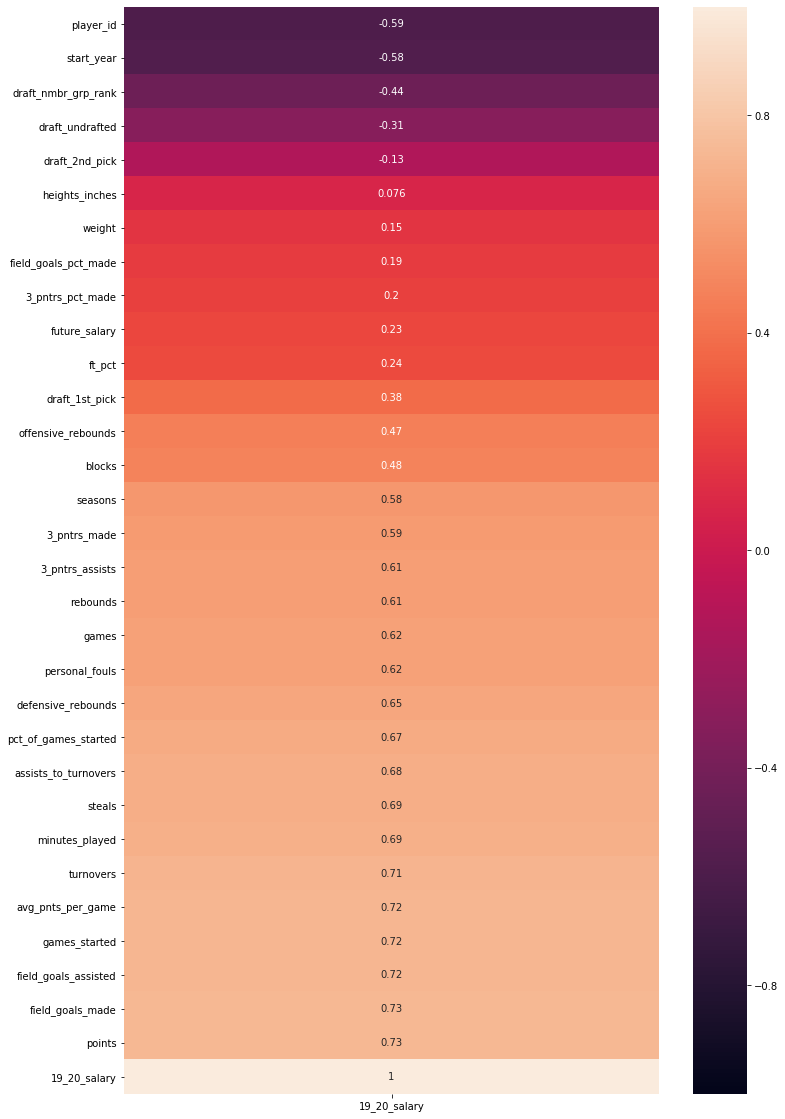

In [52]:
# Using seaborn to make a heatmap of the correlation matrix for '19_20_salary'
# The correlation of all features and current salary is shown from the most negative
# correlation to the most positive

correlations = df.corr()[['19_20_salary']]
plt.figure(figsize=(12,20))
sns.heatmap(correlations.sort_values(by='19_20_salary'), vmax=1, vmin = -1, annot=True);

### Salary Distributions

In [53]:
# Creating DataFrames for players in smaller salary ranges to observe distributions
# more closely

df_lower_than_10mil = df[df['19_20_salary'] < 10000000]
df_lower_than_2mil= df[df['19_20_salary'] < 2000000]
df_lower_than_500k= df[df['19_20_salary'] < 500000]

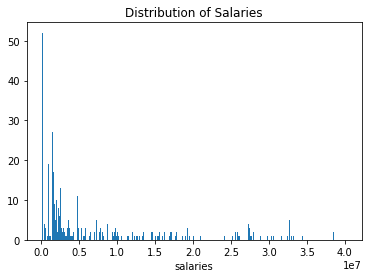

In [54]:
# Plotting the distribution of all salaries

plt.hist(df['19_20_salary'], bins = 464)
plt.title('Distribution of Salaries')
plt.xlabel('salaries');

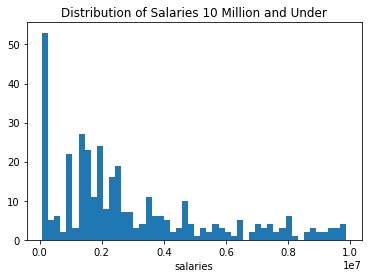

In [55]:
# Plotting the distribution of salaries under 10 million

plt.hist(df_lower_than_10mil['19_20_salary'], bins=50)
plt.title('Distribution of Salaries 10 Million and Under')
plt.xlabel('salaries');

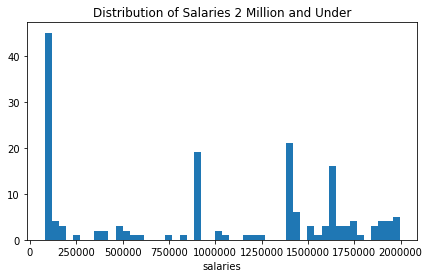

In [56]:
# Plotting the distribution of salaries under 2 million

plt.figure(figsize=(7,4))
plt.hist(df_lower_than_2mil['19_20_salary'], bins=50)
plt.title('Distribution of Salaries 2 Million and Under')
plt.xlabel('salaries');

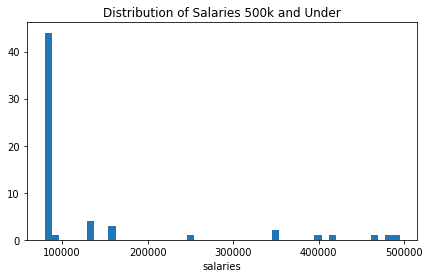

In [57]:
# Plotting the distribution of salaries under 500k

plt.figure(figsize=(7,4))
plt.hist(df_lower_than_500k['19_20_salary'], bins=50)
plt.title('Distribution of Salaries 500k and Under')
plt.xlabel('salaries');

### Distributions and Relationships

In [58]:
# Separating numeric features into a new DataFrame and isolating the list of columns

df_all_numeric = df.drop(columns=['player_name', 'team', 'height', 'weight',
                                  'draft_number_group'])
cols = df_all_numeric.columns

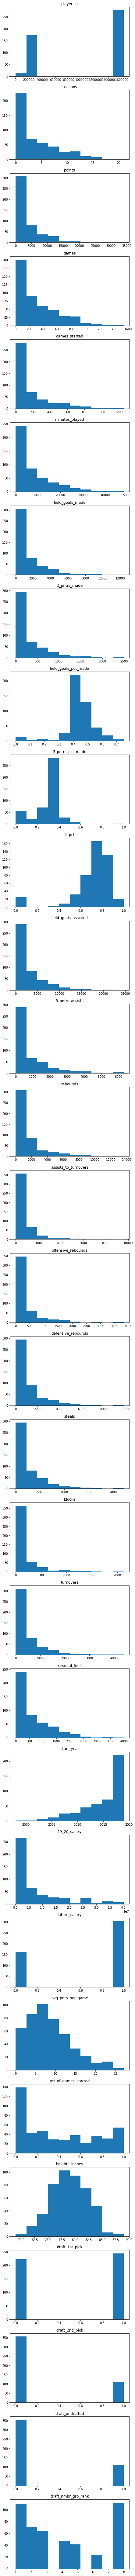

In [59]:
# Iterating through the list of columns to print histograms of each numeric feature

fig, axes = plt.subplots(nrows= len(cols), figsize=(7, 5 * len(cols)))
for n,col in enumerate(cols):
    axes[n].hist(df[col])
    axes[n].set_title(col);
    

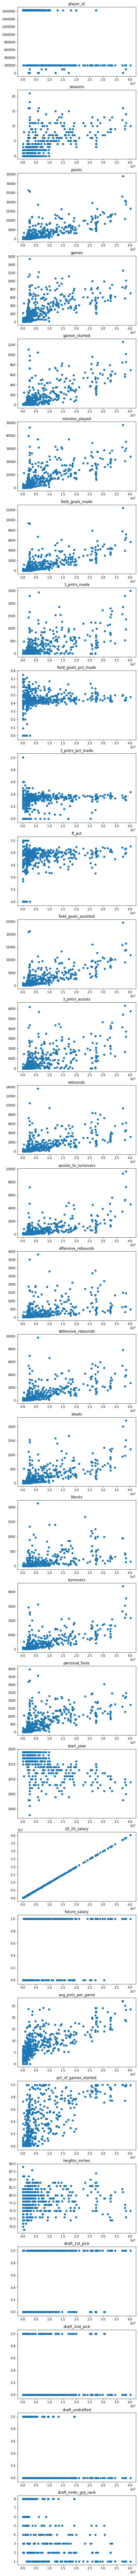

In [60]:
# Iterating through the list of columns to print scatterplots of each feature's
# relationship with '19_20_salary'

fig, axes = plt.subplots(nrows= len(cols), figsize=(7, 5 * len(cols)))
for n,col in enumerate(cols):
    X = df['19_20_salary']
    y = df[col]
    axes[n].scatter(X,y)
    axes[n].set_title(col);
    

In [39]:
# Exploring which players have an average points per game of above 20

df[df['avg_pnts_per_game'] > 20]

,player_id,player_name,team,height,weight,seasons,points,games,games_started,minutes_played,...,19_20_salary,future_salary,avg_pnts_per_game,pct_of_games_started,heights_inches,draft_1st_pick,draft_2nd_pick,draft_undrafted,draft_number_group,draft_nmbr_grp_rank
37,2546,Carmelo Anthony,POR,6-8,238.0,16,26293,1113,1105,39719.0,...,2159029,0,23.623540,0.992812,80,1,0,0,1-10,1
53,203078,Bradley Beal,WAS,6-3,207.0,7,11386,544,510,18793.0,...,27093018,1,20.930147,0.937500,75,1,0,0,1-10,1
68,1626164,Devin Booker,PHX,6-5,206.0,4,7410,333,308,11151.0,...,27285000,1,22.252252,0.924925,77,1,0,0,11-20,2
117,202326,DeMarcus Cousins,GSW,6-11,270.0,9,12006,565,543,18079.0,...,3500000,0,21.249558,0.961062,83,1,0,0,1-10,1
123,201939,Stephen Curry,GSW,6-3,185.0,10,16419,699,693,23999.0,...,40231758,1,23.489270,0.991416,75,1,0,0,1-10,1
125,203076,Anthony Davis,LAL,6-10,253.0,7,12500,520,515,17960.0,...,27093019,1,24.038462,0.990385,82,1,0,0,1-10,1
128,201942,DeMar DeRozan,SAS,6-6,220.0,10,16270,812,800,27730.0,...,27739975,1,20.036946,0.985222,78,1,0,0,1-10,1
136,1629029,Luka Doncic,DAL,6-7,230.0,1,3009,124,124,4041.0,...,7683360,1,24.266129,1.000000,79,1,0,0,1-10,1
145,201142,Kevin Durant,BKN,6-10,240.0,12,22940,849,849,31304.0,...,37199000,1,27.020024,1.000000,82,1,0,0,1-10,1
148,203954,Joel Embiid,PHI,7-0,280.0,3,4834,201,201,6154.0,...,27504630,1,24.049751,1.000000,84,1,0,0,1-10,1


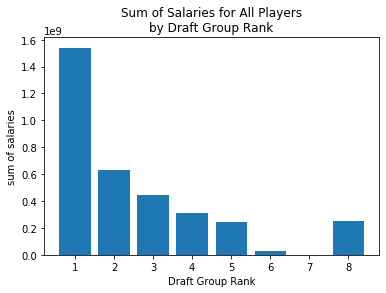

In [44]:
# Plotting the sum of salaries for all of the players in each draft group by rank

sum_salary_bydraft = df['19_20_salary'].groupby(df['draft_nmbr_grp_rank']).sum()
avg_salary_bydraft = df['19_20_salary'].groupby(df['draft_nmbr_grp_rank']).mean()
draft_groups = list(set(df['draft_nmbr_grp_rank']))

plt.bar(x=draft_groups, height=sum_salary_bydraft)
plt.title('Sum of Salaries for All Players\nby Draft Group Rank')
plt.ylabel('sum of salaries')
plt.xlabel('Draft Group Rank');